# STRUCTURE:
## - Experiment settings
#### -- Fit
## - Experiment results observation
#### -- Plot the latent $\theta$s
#### -- Plot the latent $\phi$s
#### -- Visualise the init $\beta$s
#### -- Visualise the init $\theta$s
## - Initialisation
#### -- Define parameters
#### -- Generate or load corpus
## - Backlog
#### -- Random $\beta$s
#### -- Plotting $\alpha$s in 3-D
#### -- Load, fit, and dump

# EXPERIMENT SETTINGS

### Fit

In [7]:
n_it = 51
name_model_out = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s' \
        % (var_init, var_basic, var_prop, n_it, str(autoreg))
clf.fit(corpus=corpus_pp, n_it=n_it)

DTM_Alpha has started.
Iteration: 25
Alpha update rate: 0.49
Iteration: 50
Alpha update rate: 0.49
[[  4.30008933e-05   3.75507872e-05   3.76236262e-05   2.91790900e-01
    7.07881514e-01   5.53133177e-05   3.75965192e-05   4.12943893e-05
    3.76554138e-05   3.75507872e-05]
 [  9.90372568e-06   9.92384702e-06   1.97191185e-01   9.97427672e-06
    9.90395758e-06   1.79328765e-05   9.90289532e-06   3.06913010e-01
    2.99756791e-01   1.96071473e-01]]


### Save a fit model

In [6]:
vars_clf = vars(clf)
pkl.dump(vars_clf, open(PATH_OUT_MODEL + name_model_out, 'wb'))

# EXPERIMENT RESULTS OBSERVATION

### Plot the latent $\theta$s

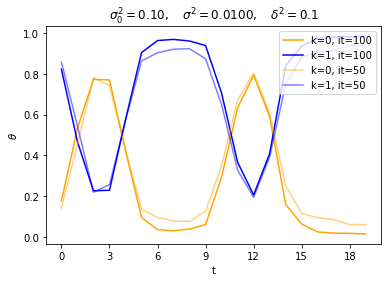

In [5]:
history_alpha = clf.hist_alpha
visualiser_corpus.plot_latent_alpha(history_alpha, n_it, var_init=var_init,
                                    var_basic=var_basic, var_prop=var_prop)
# plt.savefig(PATH_OUT_RESULTS + name_model_out + '.png', dpi=300)

### Plot the latent $\phi$s

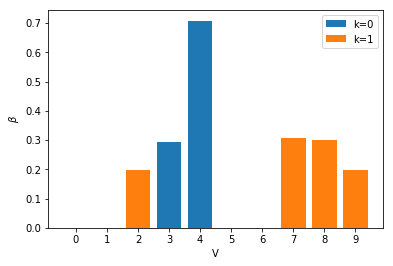

In [16]:
phi_last = clf.hist_phi[-1]
visualiser_corpus.plot_init_betas(phi_last)

### Visualise the init $\beta$s

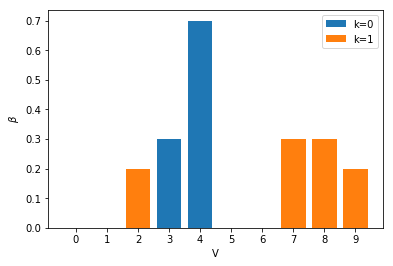

In [5]:
visualiser_corpus.plot_init_betas(beta)
# plt.savefig('betas.png')

### Visualise the init $\theta$s

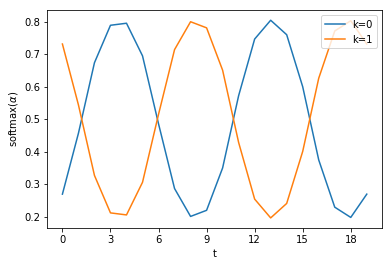

In [6]:
visualiser_corpus.plot_init_alphas(alphas)
# plt.savefig('alphas-init.png')

# INITIALISATION

### Define parameters

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pickle as pkl
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

PATH_HOME = os.path.expanduser('~') + '/Projects/ssmsi/'
PATH_SRC_MODEL = PATH_HOME + 'code/models/'
PATH_SRC_AUXILIARY = PATH_HOME + 'code/pre-processing/'
PATH_DATA = PATH_HOME + 'data/corpora_processed/'
sys.path.append(PATH_SRC_MODEL)
sys.path.append(PATH_SRC_AUXILIARY)
'''
Corpus parameters
''' 
K = 2
T = 20
V = 10
'''
Initialising the model
'''
from dtm_alpha import DTM_Alpha
var_init = 0.1
var_basic = 0.01
var_prop = 0.1
autoreg = True
clf = DTM_Alpha(K=K, sigma_0_sq=var_init, sigma_sq=var_basic, 
        delta_sq=var_prop, autoreg=autoreg)
name_clf = clf.__class__.__name__.lower()
PATH_OUT_RESULTS = PATH_HOME + 'data/models/{}/results/'.format(name_clf)
PATH_OUT_MODEL = PATH_HOME + 'data/models/{}/prefit-models/'.format(name_clf)
'''
Corpus generation params
'''
xi = 1000
linspace_4pi = np.linspace(0, 4 * np.pi, num=T)
alphas = np.zeros((T, K))
alphas[:, 0] = np.sin(linspace_4pi)
alphas[:, 1] = np.cos(linspace_4pi)
beta = np.array([[0, 0, 0, 0.3, 0.7, 0, 0, 0, 0, 0],
                 [0, 0, 0.2, 0, 0, 0, 0, 0.3, 0.3, 0.2]])

from visualiser_corpus import Visualiser_Corpus
from processor_corpus import Processor_Corpus
from generator_corpus import Generator_Corpus

### Data pre-processing
#### - Generation or loading

In [2]:
'''
Option 1: Load a corpus
Option 2: Generate and pre-process a corpus
'''
corpus_pp = pd.read_pickle(PATH_DATA + 'corpus_synthetic_nparray.pkl')
vocab = pd.read_pickle(PATH_DATA + 'vocab_synthetic.pkl')
# generator_corpus = Generator_Corpus(alphas=alphas, beta=beta, xi=xi, T=T)
# corpus = generator_corpus.generate_corpus()
# processor_corpus = Processor_Corpus(corpus=corpus, vocab=vocab)
# count_max = 200
# normalise = True
# corpus_pp = processor_corpus.process_corpus(threshold=count_max, normalise=normalise)
'''
Initialising the visualisation factory
'''
l_row = 62
l_column = 1.25
n_rows = 8
visualiser_corpus = Visualiser_Corpus(corpus_pp, vocab, n_rows, l_row, l_column)
# '''
# Dump
# '''
# corpus_pp.dump(PATH_DATA + 'corpus_synthetic_nparray.pkl')
# vocab.dump(PATH_DATA + 'vocab_synthetic.pkl')

# BACKLOG

### Random $\beta$s

In [ ]:
## Random Betas
# prior_dirichlet = np.repeat(1./V, V)
# beta = np.random.dirichlet(prior_dirichlet, K)

### Plotting the alphas in 3D

In [74]:
import plotly.plotly as py
from plotly.graph_objs import Surface
import plotly.graph_objs as go

history_alpha = np.array(history_alpha)

alphas_softmax_proposed = np.zeros(shape=history_alpha.shape)
for it, alpha_it in enumerate(history_alpha):
    for t, alpha_proposed_t in enumerate(alpha_it):
        alphas_softmax_proposed[it][t] = softmax(alpha_proposed_t)
    
n_alphas = alphas_softmax_proposed.shape[2]
list_alphas = []
for i in range(n_alphas):
    alpha = dict(z = alphas_softmax_proposed[:, :, i], type='surface')
    list_alphas.append(alpha)
fig = go.Figure(data=list_alphas)

py.iplot(fig)

### Load, fit, and dump

In [75]:
n_it = 2000
n_it_add = 2000
var_init = 0.1
var_basic = 0.01
var_prop = 0.1
autoreg = True
name_model_in = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s' \
        % (var_init, var_basic, var_prop, n_it, str(autoreg))
name_model_out = 'init_%.0E|basic_%.0E|prop_%.0E|it_%d|autoreg_%s' \
        % (var_init, var_basic, var_prop, n_it + n_it_add, str(autoreg))

dtm_alpha = DTM_Alpha()
dtm_alpha.load_fit('models/' + name_model_in + '.pkl', n_it=n_it_add)

'''
Plot
'''
# history_alpha = dtm_alpha.hist_alpha
# alphas_last_proposed = history_alpha[n_it-1]
# alphas_softmax_last_proposed = np.zeros(shape=alphas_last_proposed.shape)
# for t, alphas_last_proposed_t in enumerate(alphas_last_proposed):
#     alphas_softmax_last_proposed[t] = softmax(alphas_last_proposed_t)

# plt.plot(linspace_t, alphas_softmax_last_proposed, linewidth=2)

'''
Save the results
'''
# plt.savefig('results/' + name_model_out + '.png')
# vars_dtm = vars(dtm_alpha)
# with open('models/' + name_model_out + '.pkl', 'wb') as f:
#         pkl.dump(vars_dtm, f)

FileNotFoundError: [Errno 2] No such file or directory: 'models/init_1E-01|basic_1E-02|prop_1E-01|it_2000|autoreg_True.pkl'